### create a practice set of lats and long combos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# load and read csv file
city_data_to_load = "weather_data/cities.csv"

In [23]:
city_data_df = pd.read_csv(city_data_to_load)

In [2]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
for coordinate in coordinates:
    print (coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
from citipy import citipy

### use the tuple function to display the lat and long combo

In [5]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [6]:
import requests

In [7]:
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


### Create an endpoint URL for a city

In [9]:
city_url= url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1824898981154ff7ec6526945e40136e&q=Boston


### Make a get request for the city weather

In [10]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

### create an incorrect endpoint URL for a city

In [11]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

### Get the text of the "Get" request

In [13]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":36.68,"feels_like":31.98,"temp_min":33.64,"temp_max":37.51,"pressure":1011,"humidity":56},"visibility":10000,"wind":{"speed":5.75,"deg":180},"clouds":{"all":90},"dt":1638149710,"sys":{"type":1,"id":3486,"country":"US","sunrise":1638100259,"sunset":1638134042},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

### or in a JSON format

In [14]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 36.68,
  'feels_like': 31.98,
  'temp_min': 33.64,
  'temp_max': 37.51,
  'pressure': 1011,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 180},
 'clouds': {'all': 90},
 'dt': 1638149710,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638100259,
  'sunset': 1638134042},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 36.68,
  'feels_like': 31.98,
  'temp_min': 33.64,
  'temp_max': 37.51,
  'pressure': 1011,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 180},
 'clouds': {'all': 90},
 'dt': 1638149710,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638100259,
  'sunset': 1638134042},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
boston_data = city_weather.json()

boston_data['main']['temp_max']

37.51

In [17]:
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37.51 56 90 5.75


In [18]:
boston_data['dt']

1638149710

### import datetime module from datetime library

In [19]:
from datetime import datetime

In [20]:
date = boston_data['dt']

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-29 01:35:10'

In [24]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


In [26]:
# import the time module
import time

# Get today's date in seconds
today = time.strftime('%x')
today

'11/28/21'

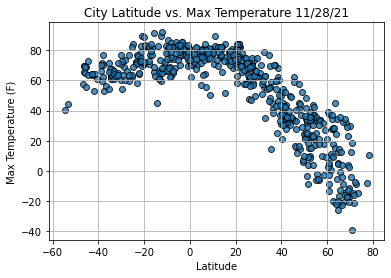

In [31]:
# Bbuild the scatter plot for latitude vs max temperatures
plt.scatter(lats,
           max_temps,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

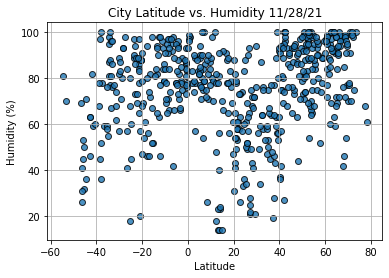

In [32]:
# Bbuild the scatter plot for latitude vs max temperatures
plt.scatter(lats,
           humidity,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

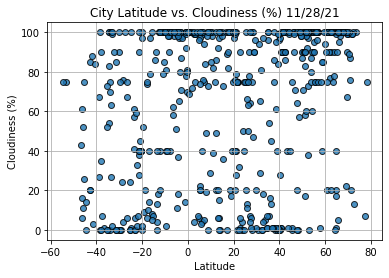

In [33]:
# Bbuild the scatter plot for latitude vs max temperatures
plt.scatter(lats,
           cloudiness,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

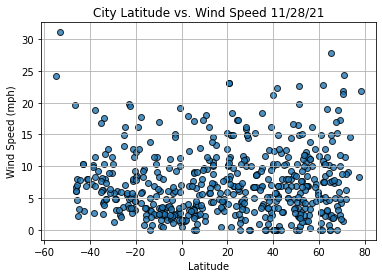

In [34]:
# Bbuild the scatter plot for latitude vs max temperatures
plt.scatter(lats,
           wind_speed,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()